# Exercise: Merging Fundamental Financial Data with Price Data and Calculating Key Ratios

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Gather Financial Data from WRDS
Retrieve fundamental data for at least three companies from WRDS (or any financial database).

In [2]:
# Load Data from WRDS CSV
fundamentals_df = pd.read_csv('../data/wrds.csv')
fundamentals_df

,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,datacqtr,datafqtr,actq,ceqq,dd1q,dlttq,niq,saleq,cik,costat
0,31/03/2010,2010,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q1,2010Q2,32336.0,39348.0,0.0,0.0,3074,13499,320193,A
1,30/06/2010,2010,3,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q2,2010Q3,36033.0,43111.0,0.0,0.0,3253,15700,320193,A
2,30/09/2010,2010,4,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q3,2010Q4,41678.0,47791.0,0.0,0.0,4308,20343,320193,A
3,31/12/2010,2011,1,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q4,2011Q1,43927.0,54666.0,NaN,0.0,6004,26741,320193,A
4,31/03/2011,2011,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2011Q1,2011Q2,46997.0,61477.0,NaN,0.0,5987,24667,320193,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,30/06/2023,2023,2,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2023Q2,2023Q2,69560.0,134033.0,1577.0,35401.0,7789,32000,1326801,A
170,30/09/2023,2023,3,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2023Q3,2023Q3,78378.0,142873.0,1545.0,35331.0,11583,34146,1326801,A
171,31/12/2023,2023,4,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2023Q4,2023Q4,85365.0,153168.0,1713.0,36211.0,14017,40111,1326801,A
172,31/03/2024,2024,1,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2024Q1,2024Q1,75330.0,149529.0,1676.0,35957.0,12369,36455,1326801,A


In [3]:
# Rename column "tic" to "Ticker"
fundamentals_df.rename(columns={"tic": "Ticker"}, inplace=True)
fundamentals_df

,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,Ticker,cusip,conm,...,datacqtr,datafqtr,actq,ceqq,dd1q,dlttq,niq,saleq,cik,costat
0,31/03/2010,2010,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q1,2010Q2,32336.0,39348.0,0.0,0.0,3074,13499,320193,A
1,30/06/2010,2010,3,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q2,2010Q3,36033.0,43111.0,0.0,0.0,3253,15700,320193,A
2,30/09/2010,2010,4,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q3,2010Q4,41678.0,47791.0,0.0,0.0,4308,20343,320193,A
3,31/12/2010,2011,1,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q4,2011Q1,43927.0,54666.0,NaN,0.0,6004,26741,320193,A
4,31/03/2011,2011,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2011Q1,2011Q2,46997.0,61477.0,NaN,0.0,5987,24667,320193,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,30/06/2023,2023,2,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2023Q2,2023Q2,69560.0,134033.0,1577.0,35401.0,7789,32000,1326801,A
170,30/09/2023,2023,3,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2023Q3,2023Q3,78378.0,142873.0,1545.0,35331.0,11583,34146,1326801,A
171,31/12/2023,2023,4,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2023Q4,2023Q4,85365.0,153168.0,1713.0,36211.0,14017,40111,1326801,A
172,31/03/2024,2024,1,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2024Q1,2024Q1,75330.0,149529.0,1676.0,35957.0,12369,36455,1326801,A


In [4]:
# Convert datadate to datetime
fundamentals_df["datadate"] = pd.to_datetime(fundamentals_df["datadate"], format='%d/%m/%Y')

# Rename column "datadate" to "Date"
fundamentals_df.rename(columns={"datadate": "Date"}, inplace=True)
fundamentals_df

,Date,fyearq,fqtr,indfmt,consol,popsrc,datafmt,Ticker,cusip,conm,...,datacqtr,datafqtr,actq,ceqq,dd1q,dlttq,niq,saleq,cik,costat
0,2010-03-31,2010,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q1,2010Q2,32336.0,39348.0,0.0,0.0,3074,13499,320193,A
1,2010-06-30,2010,3,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q2,2010Q3,36033.0,43111.0,0.0,0.0,3253,15700,320193,A
2,2010-09-30,2010,4,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q3,2010Q4,41678.0,47791.0,0.0,0.0,4308,20343,320193,A
3,2010-12-31,2011,1,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2010Q4,2011Q1,43927.0,54666.0,NaN,0.0,6004,26741,320193,A
4,2011-03-31,2011,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,2011Q1,2011Q2,46997.0,61477.0,NaN,0.0,5987,24667,320193,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2023-06-30,2023,2,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2023Q2,2023Q2,69560.0,134033.0,1577.0,35401.0,7789,32000,1326801,A
170,2023-09-30,2023,3,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2023Q3,2023Q3,78378.0,142873.0,1545.0,35331.0,11583,34146,1326801,A
171,2023-12-31,2023,4,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2023Q4,2023Q4,85365.0,153168.0,1713.0,36211.0,14017,40111,1326801,A
172,2024-03-31,2024,1,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,2024Q1,2024Q1,75330.0,149529.0,1676.0,35957.0,12369,36455,1326801,A


### Step 2: Get Yahoo Finance Price Data
Retrieve daily adjusted closing price data for the same three companies using the yfinance library.

In [5]:
tickers = ["AAPL", "IBM", "META"]

# Download historical data for the tickers from 2010 onwards
df_yf = yf.download(tickers, start="2010-01-01")

# Reset the index to convert the date into a column
df_yf = df_yf.reset_index()

# Convert the date to a datetime object
df_yf["Date"] = df_yf["Date"].dt.date

df_yf.head()

[*********************100%***********************]  3 of 3 completed


Price         Date Adj Close                     Close                   \
Ticker                  AAPL        IBM META      AAPL         IBM META   
0       2010-01-04  6.454503  75.353790  NaN  7.643214  126.625237  NaN   
1       2010-01-05  6.465665  74.443504  NaN  7.656429  125.095604  NaN   
2       2010-01-06  6.362820  73.959938  NaN  7.534643  124.282982  NaN   
3       2010-01-07  6.351058  73.703926  NaN  7.520714  123.852776  NaN   
4       2010-01-08  6.393279  74.443504  NaN  7.570714  125.095604  NaN   

Price       High                        Low                       Open  \
Ticker      AAPL         IBM META      AAPL         IBM META      AAPL   
0       7.660714  127.122368  NaN  7.585000  125.095604  NaN  7.622500   
1       7.699643  126.051628  NaN  7.616071  124.378586  NaN  7.664286   
2       7.686786  125.707458  NaN  7.526786  124.101341  NaN  7.656429   
3       7.571429  124.521988  NaN  7.466071  123.240921  NaN  7.562500   
4       7.571429  125.162521  NaN  7.466429  123.374763  NaN  7.510714   

Price                       Volume                
Ticker         IBM META       AAPL      IBM META  
0       125.411087  NaN  493729600  6438444  NaN  
1       125.889099  NaN  601904800  7156104  NaN  
2       124.933075  NaN  552160000  5863144  NaN  
3       124.158699  NaN  477131200  6109268  NaN  
4       123.393883  NaN  447610800  4390271  NaN

In [6]:
# Flatten the MultiIndex columns
df_yf.columns = ["_".join(col).strip() if isinstance(col, tuple) else col for col in df_yf.columns.values]
# Remove "_" if it is at the beginning or end of the column name
df_yf.columns = df_yf.columns.str.strip("_")
df_yf

,Date,Adj Close_AAPL,Adj Close_IBM,Adj Close_META,Close_AAPL,Close_IBM,Close_META,High_AAPL,High_IBM,High_META,Low_AAPL,Low_IBM,Low_META,Open_AAPL,Open_IBM,Open_META,Volume_AAPL,Volume_IBM,Volume_META
0,2010-01-04,6.454503,75.353790,NaN,7.643214,126.625237,NaN,7.660714,127.122368,NaN,7.585000,125.095604,NaN,7.622500,125.411087,NaN,493729600,6438444,NaN
1,2010-01-05,6.465665,74.443504,NaN,7.656429,125.095604,NaN,7.699643,126.051628,NaN,7.616071,124.378586,NaN,7.664286,125.889099,NaN,601904800,7156104,NaN
2,2010-01-06,6.362820,73.959938,NaN,7.534643,124.282982,NaN,7.686786,125.707458,NaN,7.526786,124.101341,NaN,7.656429,124.933075,NaN,552160000,5863144,NaN
3,2010-01-07,6.351058,73.703926,NaN,7.520714,123.852776,NaN,7.571429,124.521988,NaN,7.466071,123.240921,NaN,7.562500,124.158699,NaN,477131200,6109268,NaN
4,2010-01-08,6.393279,74.443504,NaN,7.570714,125.095604,NaN,7.571429,125.162521,NaN,7.466429,123.374763,NaN,7.510714,123.393883,NaN,447610800,4390271,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,2024-10-11,227.550003,233.259995,589.950012,227.550003,233.259995,589.950012,229.410004,233.440002,591.210022,227.339996,230.460007,582.710022,229.300003,233.250000,584.830017,31759200,3469200,8587100.0
3719,2024-10-14,231.300003,235.259995,590.419983,231.300003,235.259995,590.419983,231.729996,236.119995,600.099976,228.600006,233.169998,589.960022,228.699997,233.570007,594.219971,39882100,2524400,8252000.0
3720,2024-10-15,233.850006,232.960007,586.270020,233.850006,232.960007,586.270020,237.490005,237.369995,590.609985,232.369995,232.710007,580.140015,233.610001,236.399994,590.159973,64751400,3350600,9564200.0
3721,2024-10-16,231.779999,233.669998,576.789978,231.779999,233.669998,576.789978,232.119995,233.880005,582.080017,229.839996,231.119995,574.030029,231.600006,232.110001,581.400024,34065100,2846100,11251300.0


In [7]:
# Melt the DataFrame to long format to be able to separate the variable and ticker
df_yf_long = pd.melt(df_yf, id_vars=["Date"], var_name="Var Ticker", value_name="Value")

# Split the Var Ticker column into two columns to separate the variable and ticker
df_yf_long[["Variable", "Ticker"]] = df_yf_long["Var Ticker"].str.split("_", expand=True)

# Drop the Var Ticker column as it is no longer needed
df_yf_long = df_yf_long.drop(columns=["Var Ticker"])

# Convert Date to datetime
df_yf_long["Date"] = pd.to_datetime(df_yf_long["Date"])

# Pivot the DataFrame to wide format
df_yf_long = df_yf_long.pivot(index=["Date", "Ticker"], columns="Variable", values="Value").reset_index()
df_yf_long

Variable,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,AAPL,6.454503,7.643214,7.660714,7.585000,7.622500,493729600.0
1,2010-01-04,IBM,75.353790,126.625237,127.122368,125.095604,125.411087,6438444.0
2,2010-01-04,META,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-05,AAPL,6.465665,7.656429,7.699643,7.616071,7.664286,601904800.0
4,2010-01-05,IBM,74.443504,125.095604,126.051628,124.378586,125.889099,7156104.0
...,...,...,...,...,...,...,...,...
11164,2024-10-16,IBM,233.669998,233.669998,233.880005,231.119995,232.110001,2846100.0
11165,2024-10-16,META,576.789978,576.789978,582.080017,574.030029,581.400024,11251300.0
11166,2024-10-17,AAPL,232.050003,232.050003,233.850006,230.529999,233.440002,19232128.0
11167,2024-10-17,IBM,232.679993,232.679993,233.125000,230.654999,232.000000,1775188.0


### Step 3: Merge Fundamental Data with Price Data
Use the merge_asof() function to merge the fundamental data with the daily adjusted price data.

In [8]:
# Sort the data in both DataFrames before merging
fundamentals_df = fundamentals_df.sort_values(by=["Date"])
df_yf_long = df_yf_long.sort_values(by=["Date"])

# Use direction="forward" to fill the missing values with the most recent value
df_merged = pd.merge_asof(fundamentals_df, df_yf_long, on="Date", by="Ticker", direction="forward")

df_merged

,Date,fyearq,fqtr,indfmt,consol,popsrc,datafmt,Ticker,cusip,conm,...,niq,saleq,cik,costat,Adj Close,Close,High,Low,Open,Volume
0,2010-03-31,2010,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,3074,13499,320193,A,7.087559,8.392857,8.450357,8.373571,8.410357,430659600.0
1,2010-03-31,2010,1,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,2601,22857,51143,A,73.290649,122.609940,123.087952,122.036331,122.590820,5130421.0
2,2010-03-31,2010,1,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,95,345,1326801,A,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-06-30,2010,3,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,3253,15700,320193,A,7.586102,8.983214,9.213214,8.928929,9.168214,739452000.0
4,2010-06-30,2010,2,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,3386,23724,51143,A,70.926476,118.049713,119.713196,117.590820,119.340347,8386828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-03-31,2024,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,23636,90753,320193,A,169.603378,170.029999,171.250000,169.479996,171.190002,46240500.0
170,2024-03-31,2024,1,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,1605,14462,51143,A,186.334396,189.830002,190.460007,188.520004,190.000000,2364300.0
171,2024-06-30,2024,2,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,1834,15769,51143,A,173.581818,175.100006,176.460007,173.380005,173.449997,3321000.0
172,2024-06-30,2024,3,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,21448,85777,320193,A,216.499405,216.750000,217.509995,211.919998,212.089996,60402900.0


### Step 4: Calculate Financial Ratios
Task: Using the merged dataset, calculate the following financial ratios for each company: Return on Assets (RoA), Liabilities/Total Assets, Size (Natural Logarithm of Total Assets).

In [18]:
# Calculate ROA, handling division by zero
df_merged["ROA"] = np.where(df_merged["actq"] == 0, 0, df_merged["niq"] / df_merged["actq"])

# Calculate Liabilities/Total Assets = (Total Assets - Common Equity) / Total Assets
df_merged["Liabilities/Total Assets"] = (df_merged["actq"] - df_merged["ceqq"]) / df_merged["actq"]

# Size (Natural log of Total Assets)
df_merged["Size"] = np.log(df_merged["actq"])

df_merged

,Date,fyearq,fqtr,indfmt,consol,popsrc,datafmt,Ticker,cusip,conm,...,costat,Adj Close,Close,High,Low,Open,Volume,ROA,Liabilities/Total Assets,Size
0,2010-03-31,2010,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,A,7.087559,8.392857,8.450357,8.373571,8.410357,430659600.0,0.095064,-0.216848,10.383936
1,2010-03-31,2010,1,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,A,73.290649,122.609940,123.087952,122.036331,122.590820,5130421.0,0.056918,0.517846,10.729788
2,2010-03-31,2010,1,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-06-30,2010,3,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,A,7.586102,8.983214,9.213214,8.928929,9.168214,739452000.0,0.090278,-0.196431,10.492190
4,2010-06-30,2010,2,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,A,70.926476,118.049713,119.713196,117.590820,119.340347,8386828.0,0.075420,0.530928,10.712082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-03-31,2024,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,A,169.603378,170.029999,171.250000,169.479996,171.190002,46240500.0,0.184058,0.422237,11.763030
170,2024-03-31,2024,1,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,A,186.334396,189.830002,190.460007,188.520004,190.000000,2364300.0,0.043778,0.365528,10.509496
171,2024-06-30,2024,2,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,A,173.581818,175.100006,176.460007,173.380005,173.449997,3321000.0,0.055077,0.278477,10.413283
172,2024-06-30,2024,3,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,A,216.499405,216.750000,217.509995,211.919998,212.089996,60402900.0,0.170989,0.468187,11.739543


### Extra Challenge: Analyze Correlations and Visualize Results
Check Correlations: Calculate the correlation between the stock price and the financial ratios you calculated (RoA, Liabilities/Total Assets, Size). This will help you understand how market prices relate to underlying financial fundamentals.

In [19]:
# Calculate the correlation between "Adj Close" and "ROA"
correlation = df_merged["Adj Close"].corr(df_merged["ROA"])
print(f"Correlation between 'Adj Close' and 'ROA': {correlation}")

Correlation between 'Adj Close' and 'ROA': 0.1429089951682768


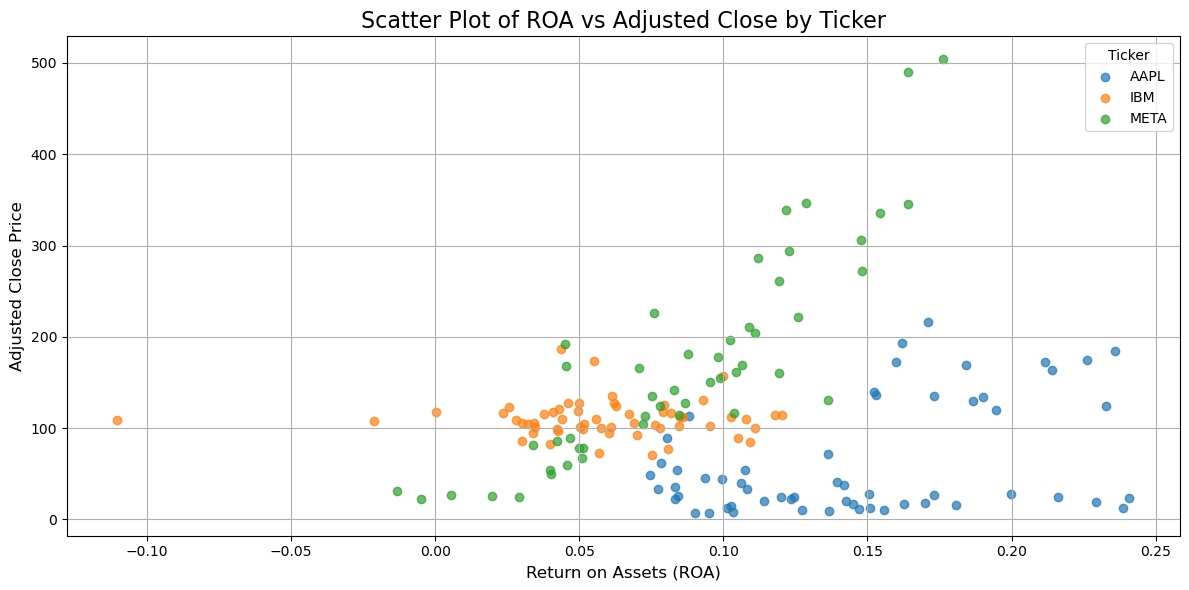

In [21]:
# Visualize the correlation between "Adj Close" and "ROA"
# Create the scatter plot
plt.figure(figsize=(12, 6))

# Loop through each unique ticker and plot the data
for ticker in df_merged['Ticker'].unique():
    ticker_data = df_merged[df_merged['Ticker'] == ticker]
    plt.scatter(ticker_data['ROA'], ticker_data['Adj Close'], label=ticker, alpha=0.7)

# Adding titles and labels
plt.title('Scatter Plot of ROA vs Adjusted Close by Ticker', fontsize=16)
plt.xlabel('Return on Assets (ROA)', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.legend(title='Ticker')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
# Calculate the rolling 4-quarter ROA for each ticker
df_merged['Rolling ROA'] = df_merged.groupby('Ticker')['ROA'].rolling(window=4).mean().reset_index(level=0, drop=True)
df_merged

,Date,fyearq,fqtr,indfmt,consol,popsrc,datafmt,Ticker,cusip,conm,...,Adj Close,Close,High,Low,Open,Volume,ROA,Liabilities/Total Assets,Size,Rolling ROA
0,2010-03-31,2010,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,7.087559,8.392857,8.450357,8.373571,8.410357,430659600.0,0.095064,-0.216848,10.383936,NaN
1,2010-03-31,2010,1,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,73.290649,122.609940,123.087952,122.036331,122.590820,5130421.0,0.056918,0.517846,10.729788,NaN
2,2010-03-31,2010,1,INDL,C,D,STD,META,30303M102,META PLATFORMS INC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-06-30,2010,3,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,7.586102,8.983214,9.213214,8.928929,9.168214,739452000.0,0.090278,-0.196431,10.492190,NaN
4,2010-06-30,2010,2,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,70.926476,118.049713,119.713196,117.590820,119.340347,8386828.0,0.075420,0.530928,10.712082,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-03-31,2024,2,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,169.603378,170.029999,171.250000,169.479996,171.190002,46240500.0,0.184058,0.422237,11.763030,0.185518
170,2024-03-31,2024,1,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,186.334396,189.830002,190.460007,188.520004,190.000000,2364300.0,0.043778,0.365528,10.509496,0.062783
171,2024-06-30,2024,2,INDL,C,D,STD,IBM,459200101,INTL BUSINESS MACHINES CORP,...,173.581818,175.100006,176.460007,173.380005,173.449997,3321000.0,0.055077,0.278477,10.413283,0.065060
172,2024-06-30,2024,3,INDL,C,D,STD,AAPL,37833100,APPLE INC,...,216.499405,216.750000,217.509995,211.919998,212.089996,60402900.0,0.170989,0.468187,11.739543,0.187745


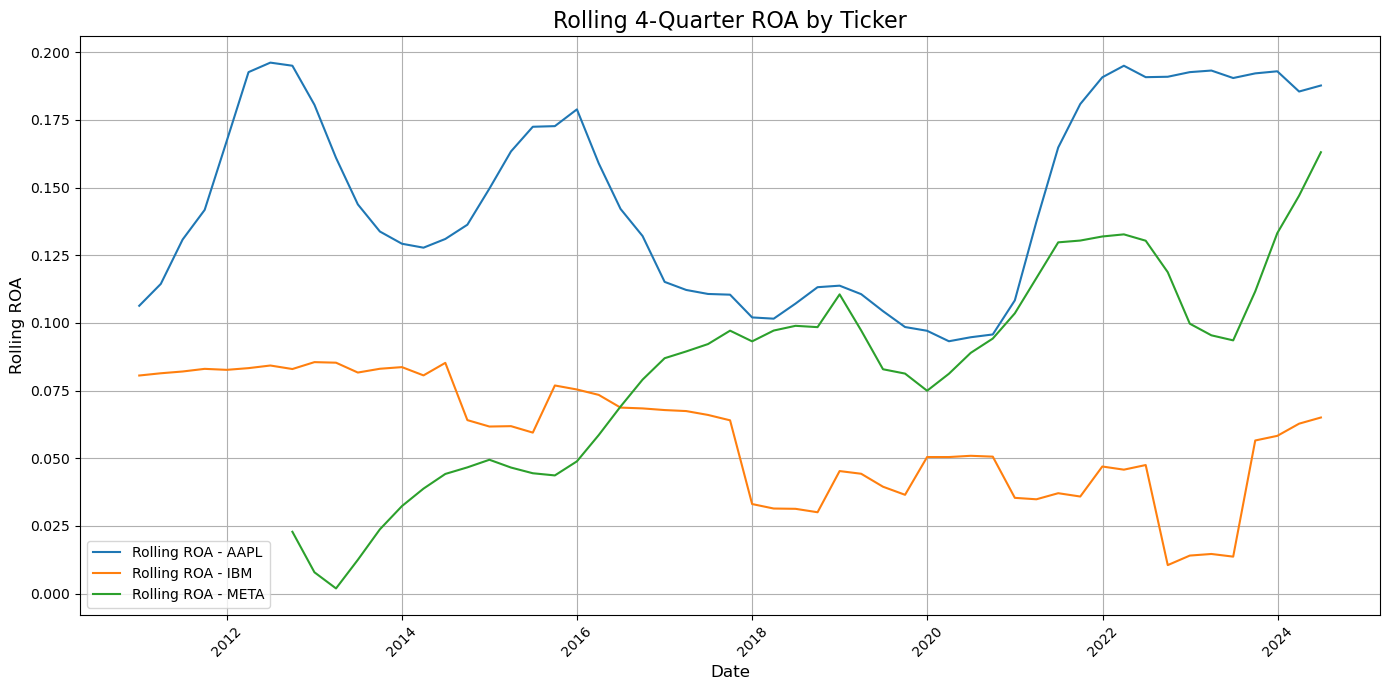

In [23]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot Rolling ROA by Ticker
for ticker in df_merged['Ticker'].unique():
    ticker_data = df_merged[df_merged['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Rolling ROA'], label=f'Rolling ROA - {ticker}')

# Adding titles and labels
plt.title('Rolling 4-Quarter ROA by Ticker', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling ROA', fontsize=12)
plt.legend()
plt.grid()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()